# Power transform

Sometimes in times series data we have polynomial or exponential trends. We can use transformations to convert these times series to a times series with linear trend.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# get data
df = pd.read_csv('./data/airline_passengers.csv', index_col=0, parse_dates=True)
df.dropna(inplace=True)

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [4]:
df.tail()

,Thousands of Passengers
Month,
1960-08,606.0
1960-09,508.0
1960-10,461.0
1960-11,390.0
1960-12,432.0


In [5]:
# define a helper function to plot line plot of times sereis and histogram
def plot_data_hist(series):
    fig = plt.figure(figsize=(12, 6))
    _ = plt.subplot(211)
    _ = series.plot()
    _ = plt.subplot(212)
    _ = series.hist()
    _ = plt.show()

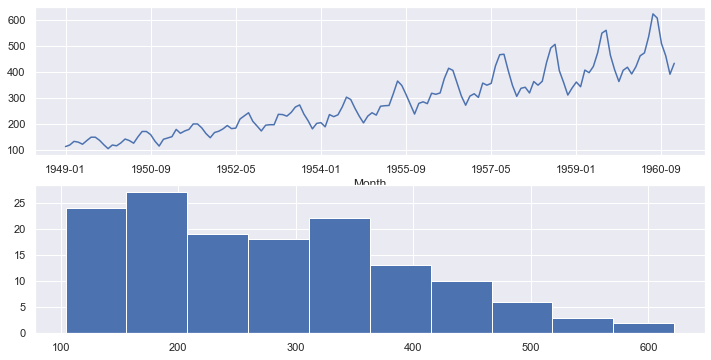

In [6]:
plot_data_hist(df['Thousands of Passengers'])

## Squared Root Transform

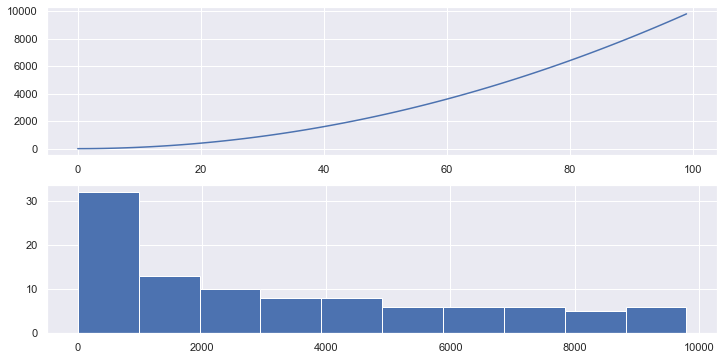

In [7]:
squares = [i**2 for i in range(100)]
series = pd.Series(squares)
plot_data_hist(series)

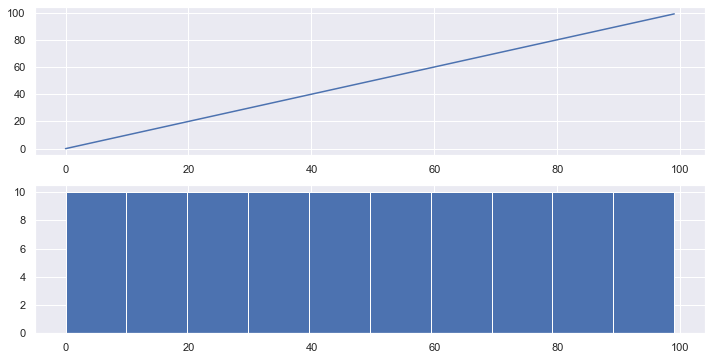

In [8]:
squared_root_transformed = np.sqrt(series)
plot_data_hist(squared_root_transformed)

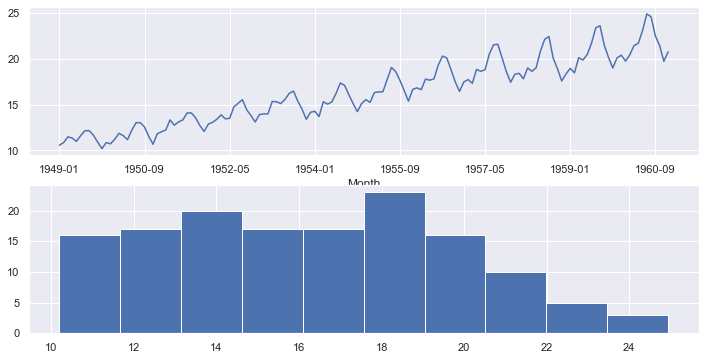

In [9]:
transformed_passangers = np.sqrt(df["Thousands of Passengers"])
plot_data_hist(transformed_passangers)

## Log transform
Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform.

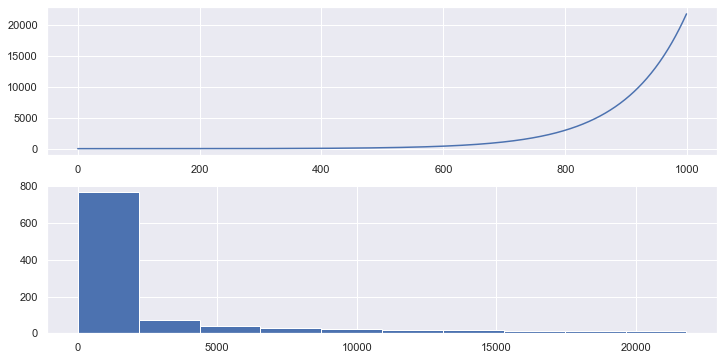

In [10]:
# generate exponential data
x_values = [0.01*i for i in range(1000)]
exponential_array = np.exp(x_values)
exponential_series = pd.Series(exponential_array)
plot_data_hist(exponential_series)

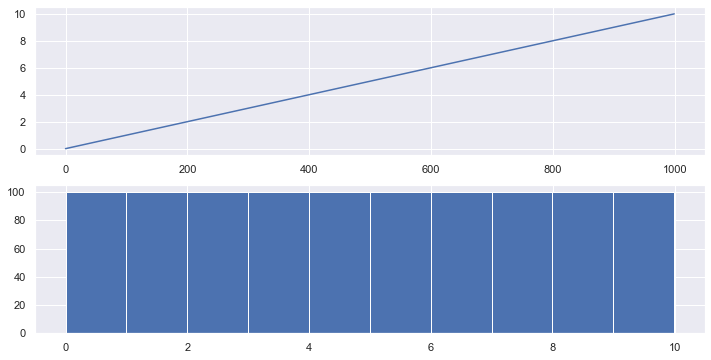

In [11]:
# log transform
log_transformed = np.log(exponential_series)
plot_data_hist(log_transformed)

In [12]:
np.log(-10)

<ipython-input-12-0d1208038d97>:1: RuntimeWarning: invalid value encountered in log
  np.log(-10)


nan

**Log** transform is usually used to remove exponential trends from times series data. To apply **Log** transform, the values of the series must be non-negative. Therefore time series data with negative values we can do:

$$\rm{transform} = \log (\rm{constant} + x)$$

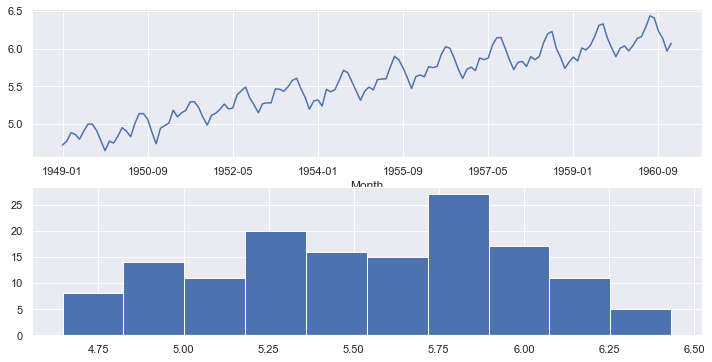

In [13]:
# log transform for passengers data
passengers_log_transformed = np.log(df["Thousands of Passengers"])
plot_data_hist(passengers_log_transformed)

## Box-cox transform 

- lambda = -1.0 is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [14]:
from scipy.stats import boxcox

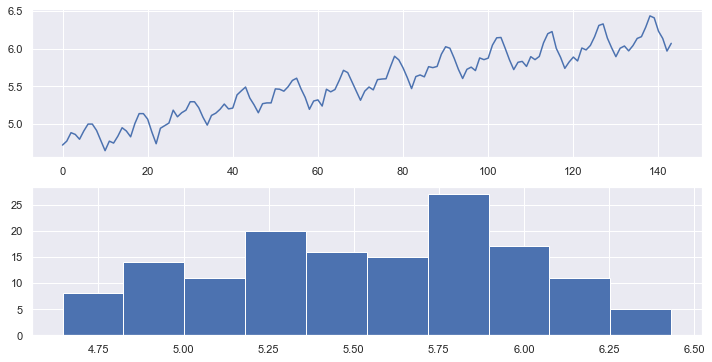

In [15]:
boxcox_passengers = boxcox(df["Thousands of Passengers"], lmbda=0.0)
boxcox_passengers = pd.Series(boxcox_passengers)
plot_data_hist(boxcox_passengers)

Lambda of boxcox transformation = 0.14802265137037945


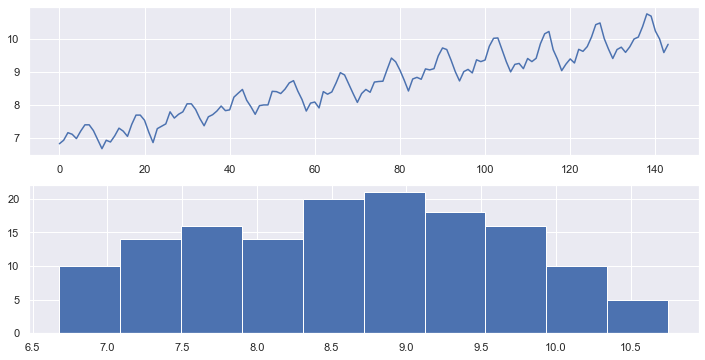

In [16]:
boxcox_passengers, lmbda = boxcox(df["Thousands of Passengers"])
print(f"Lambda of boxcox transformation = {lmbda}")
boxcox_passengers = pd.Series(boxcox_passengers)
plot_data_hist(boxcox_passengers)